In [202]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

from datetime import timedelta

In [203]:
reg_path = "all_registration.csv"
reg_header = ["day", "date", "time", "user_id", "action", "born", "phone", "country", "acquired_from"]
registration = pd.read_csv(reg_path, delimiter=';', names = reg_header)
registration["date"] = pd.to_datetime(registration["date"])

free_path = "all_free_tree.csv"
free_tree = pd.read_csv(free_path, delimiter=';', names =["day", "date", "user_id", "action"])
free_tree["date"] = pd.to_datetime(free_tree["date"])

super_path = "all_super_tree.csv"
super_tree = pd.read_csv(super_path, delimiter=';', names =["day", "date", "user_id", "action"])
super_tree["date"] = pd.to_datetime(super_tree["date"])

In [204]:
free_sends_date = free_tree.groupby("date").count()[["action"]].reset_index()

last_day = free_sends_date.date.max()
back_to_date_end = last_day - timedelta(days=86)
#back_to_date_start = last_day - timedelta(days=116)

#free_sends_date_back = free_sends_date[(free_sends_date.date <= back_to_date_end) & (free_sends_date.date >= back_to_date_start)]
free_sends_date_back = free_sends_date[(free_sends_date.date <= back_to_date_end)]
free_sends_date_back

,date,action
0,2023-10-13,298
1,2023-10-14,414
2,2023-10-15,480
3,2023-10-16,673
4,2023-10-17,686
...,...,...
182,2024-04-12,11786
183,2024-04-13,10509
184,2024-04-14,10018
185,2024-04-15,11051


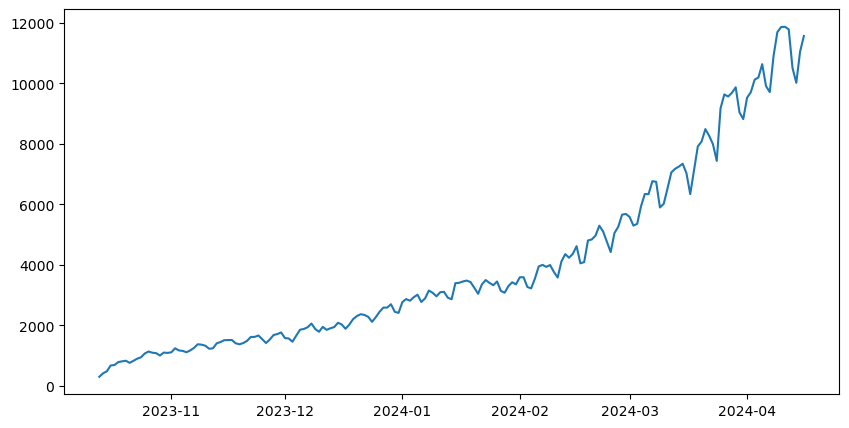

In [205]:
x = free_sends_date_back.date
y = free_sends_date_back.action

plt.figure(figsize=(10,5))
plt.plot(x, y)

In [206]:
new_x = [i+1 for i in range(len(x))]
model = np.polyfit(new_x, y, 2)
predict_model = np.poly1d(model)

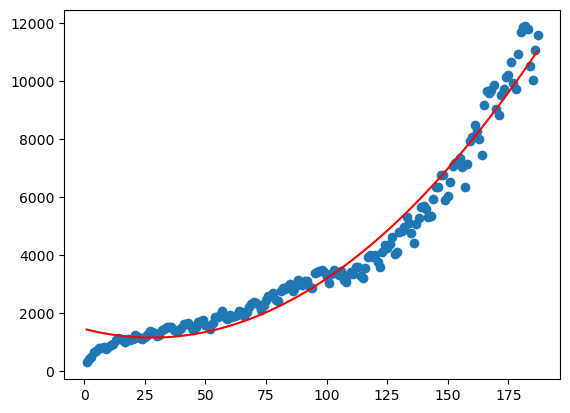

In [211]:
x_reg = np.arange(1, len(x)+1)
y_reg = predict_model(new_x)

plt.scatter(new_x, y)
plt.plot(x_reg, y_reg, c="red")
plt.show()

In [218]:
predict_days = [i for i in range((new_x[-1] + 1), (new_x[-1] + 31))]

In [220]:
last_day = free_sends_date.date.max()
back_to_date_end = last_day - timedelta(days=55)
back_to_date_start = last_day - timedelta(days=85)

free_sends_date_back = free_sends_date[(free_sends_date.date <= back_to_date_end) & (free_sends_date.date > back_to_date_start)]
#free_sends_date_back = free_sends_date[(free_sends_date.date <= back_to_date_end)]
predicted_days_real = free_sends_date_back.reset_index().rename(columns={"index":"day"})
predicted_days_real

,day,date,action
0,188,2024-04-18,11992
1,189,2024-04-19,11926
2,190,2024-04-20,11437
3,191,2024-04-21,11022
4,192,2024-04-22,11742
5,193,2024-04-23,12203
6,194,2024-04-24,12168
7,195,2024-04-25,12400
8,196,2024-04-26,12203
9,197,2024-04-27,11881


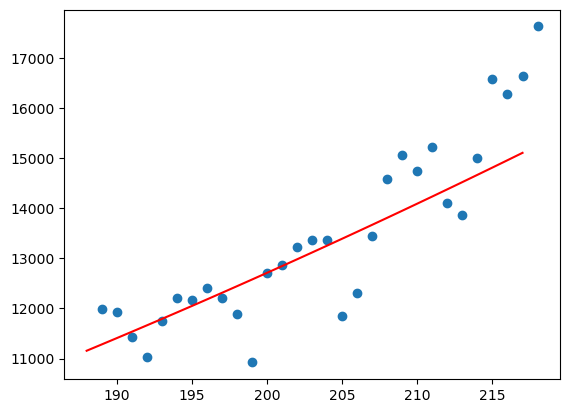

In [224]:
x2 = predicted_days_real.day +1
y2 = predicted_days_real.action

plt.scatter(x2, y2)
plt.plot(predict_days, predict_model(predict_days), color="red")
plt.show()

In [233]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [241]:
len(days_predicted)

30

In [249]:
free_sends_date = free_tree.groupby("date").count()[["action"]].reset_index()

last_day = free_sends_date.date.max()
back_to_date_end = last_day - timedelta(days=86)
#back_to_date_start = last_day - timedelta(days=116)

#free_sends_date_back = free_sends_date[(free_sends_date.date <= back_to_date_end) & (free_sends_date.date >= back_to_date_start)]
free_sends_date_back = free_sends_date[(free_sends_date.date <= back_to_date_end)]
free_sends_date_back

x = free_sends_date_back.date
y = free_sends_date_back.action
new_x = np.arange(1, len(x)+1)
new_y = y.to_numpy()

In [250]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(new_x.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, new_y)
y_predicted = poly_reg_model.predict(poly_features)

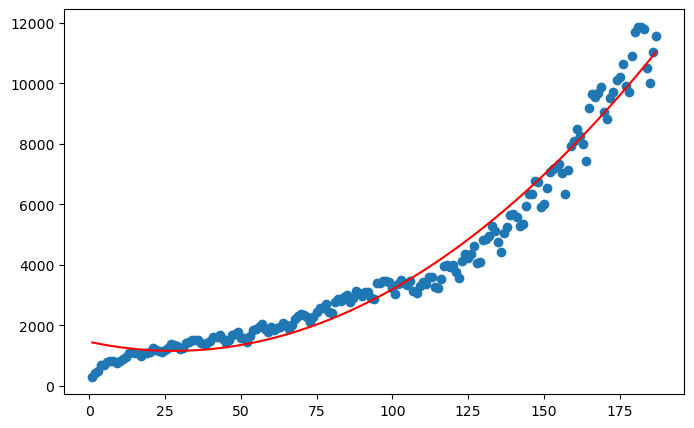

In [251]:
plt.figure(figsize=(8,5))
plt.scatter(new_x, new_y)
plt.plot(new_x, y_predicted, c="red")
plt.show()

In [262]:
predict_days = [i for i in range((new_x[-1] + 1), (new_x[-1] + 32))]
predict_days = np.arange(new_x[-1]+1, new_x[-1]+32)
predict_days = poly.fit_transform(predict_days.reshape(-1, 1))
days_predicted = poly_reg_model.predict(predict_days)
days_predicted

array([11156.00943638, 11281.20679838, 11407.18289487, 11533.93772583,
       11661.47129127, 11789.78359119, 11918.87462559, 12048.74439447,
       12179.39289783, 12310.82013567, 12443.02610798, 12576.01081478,
       12709.77425606, 12844.31643181, 12979.63734205, 13115.73698676,
       13252.61536595, 13390.27247963, 13528.70832778, 13667.92291041,
       13807.91622752, 13948.68827911, 14090.23906518, 14232.56858573,
       14375.67684075, 14519.56383026, 14664.22955425, 14809.67401271,
       14955.89720566, 15102.89913308, 15250.67979499])

In [263]:
last_day = free_sends_date.date.max()
back_to_date_end = last_day - timedelta(days=55)
back_to_date_start = last_day - timedelta(days=85)

free_sends_date_back = free_sends_date[(free_sends_date.date <= back_to_date_end) & (free_sends_date.date >= back_to_date_start)]
#free_sends_date_back = free_sends_date[(free_sends_date.date <= back_to_date_end)]
predicted_days_real = free_sends_date_back.reset_index().rename(columns={"index":"day"})

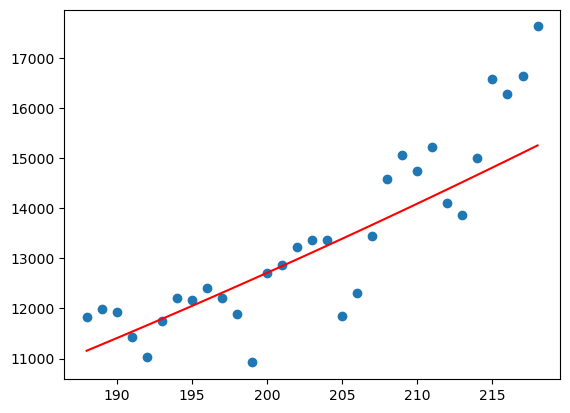

In [264]:
x2 = predicted_days_real.day +1
y2 = predicted_days_real.action

plt.scatter(x2, y2)
plt.plot(x2, days_predicted, color="red")

In [265]:
x2 = np.arange(1, len(x)+1)
y2 = y.to_numpy()
new_x2 = x2.reshape(-1, 1)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(new_x2)

x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(x_test)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

468.4134874821236